In [1]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [2]:
from qiskit import QuantumCircuit, Aer, assemble, execute
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [3]:
sim = Aer.get_backend('aer_simulator')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [5]:
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.rx(pi / 5, qreg_q[0])
circuit.ry(pi / 3, qreg_q[1])
circuit.ry(pi / 5, qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

In [6]:
editor = CircuitComposer(circuit=circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fda8e10d700>)

In [7]:
circuit_unitary = circuit.copy()

circuit_unitary.save_unitary()
qobj = assemble(circuit_unitary)
result = sim.run(qobj).result()
unitary = result.get_unitary()

In [8]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [9]:
circuit_vector  = circuit.copy()

circuit_vector.save_statevector()
qobj2 = assemble(circuit_vector)
result2 = sim.run(qobj2).result()
statevector2 = result2.get_statevector()

In [10]:
array_to_latex(statevector2, prefix="\\text{Output statevector = }")

<IPython.core.display.Latex object>

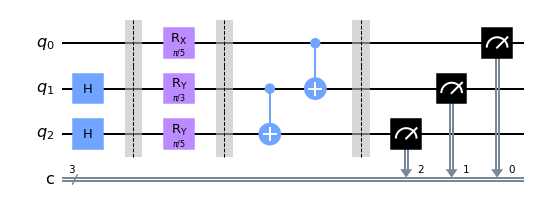

In [11]:
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

circuit.draw('mpl')

In [12]:
job = execute(circuit, sim, shots=8192)  # shots default = 1024
result = job.result()

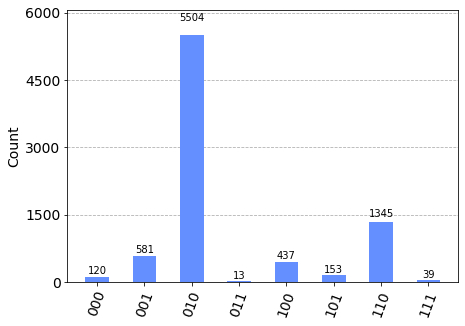

In [13]:
data = result.get_counts(circuit)
plot_histogram(data)

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table